In [ ]:
!pip install sovai[full]

### Signal Evaluation

Evaluate the quality of a proposed alpha trading signal.

In [2]:
import sovai as sov
 
sov.token_auth(token="visit https://sov.ai/profile for your token")

In [3]:
df_comprehensive = sov.data("factors/comprehensive")

In [4]:
df_comprehensive.head()

profitability  value  solvency  cash_flow  illiquidity  \
ticker date                                                                 
A      1999-11-26         57.000  8.000    17.000     77.000       14.000   
       1999-12-03         56.000  8.000    12.000     77.000       14.000   
       1999-12-10         56.000  8.000    25.000     77.000       14.000   
       1999-12-17         56.000  8.000    10.000     77.000       14.000   
       1999-12-24         55.000  7.000    25.000     77.000       14.000   

                   momentum_long_term  momentum_medium_term  \
ticker date                                                   
A      1999-11-26              61.000                57.000   
       1999-12-03              61.000                57.000   
       1999-12-10              61.000                57.000   
       1999-12-17              61.000                57.000   
       1999-12-24              61.000                57.000   

                   short_term_reversal  price_volatility  dividend_yield  \
ticker date                                                                
A      1999-11-26               47.000            29.000          29.000   
       1999-12-03               16.000            29.000          29.000   
       1999-12-10               30.000            28.000          28.000   
       1999-12-17               20.000            11.000          11.000   
       1999-12-24               12.000            13.000          13.000   

                   earnings_consistency  small_size  low_growth  \
ticker date                                                       
A      1999-11-26                65.000       3.000      51.000   
       1999-12-03                65.000       3.000      51.000   
       1999-12-10                65.000       3.000      51.000   
       1999-12-17                65.000       3.000      51.000   
       1999-12-24                65.000       3.000      51.000   

                   low_equity_issuance  bounce_dip  accrual_growth  \
ticker date                                                          
A      1999-11-26                1.000      51.000          54.000   
       1999-12-03                1.000      51.000          54.000   
       1999-12-10                1.000      51.000          54.000   
       1999-12-17                1.000      51.000          54.000   
       1999-12-24                1.000      51.000          54.000   

                   low_depreciation_growth  current_liquidity  low_rnd  \
ticker date                                                              
A      1999-11-26                   45.000             97.000   74.000   
       1999-12-03                   45.000             96.000   74.000   
       1999-12-10                   45.000             96.000   74.000   
       1999-12-17                   45.000             96.000   74.000   
       1999-12-24                   45.000             96.000   74.000   

                   momentum  market_risk  business_risk  political_risk  \
ticker date                                                               
A      1999-11-26    60.000       15.000         26.000          50.000   
       1999-12-03    61.000       15.000         26.000          50.000   
       1999-12-10    61.000       15.000         26.000          50.000   
       1999-12-17    60.000       15.000         26.000          50.000   
       1999-12-24    61.000       15.000         26.000          50.000   

                   inflation_fluctuation  inflation_persistence  returns  
ticker date                                                               
A      1999-11-26                 70.000                 38.000    0.020  
       1999-12-03                 70.000                 38.000    0.080  
       1999-12-10                 70.000                 38.000    0.006  
       1999-12-17                 70.000                 38.000    0.027  
       1999-12-24                 70.000        

Let's focus on the sensitivity of firms on `business_risk` indicators, high value means they move in close conjunction with business risks. 

In [5]:
df_risk = df_comprehensive[["business_risk"]]; del df_comprehensive; df_risk

business_risk
ticker date                     
A      1999-11-26         26.000
       1999-12-03         26.000
       1999-12-10         26.000
       1999-12-17         26.000
       1999-12-24         26.000
...                          ...
ZZ     2013-02-15         55.000
       2013-02-22         44.000
       2013-03-01         43.000
       2013-03-08         44.000
       2013-03-15         45.000

[9062256 rows x 1 columns]

## Alpha Signal Evaluation

In [7]:
evaluator = df_risk.signal_evaluator()

SignalEvaluator object created successfully with optimized weights.


**Performance Plot:**
This plot showcases the cumulative performance of the strategy over time, accompanied by a rolling Sharpe ratio. It displays the strategy returns, a 95% confidence interval derived from random simulations, and the rolling Sharpe ratio on a secondary y-axis.

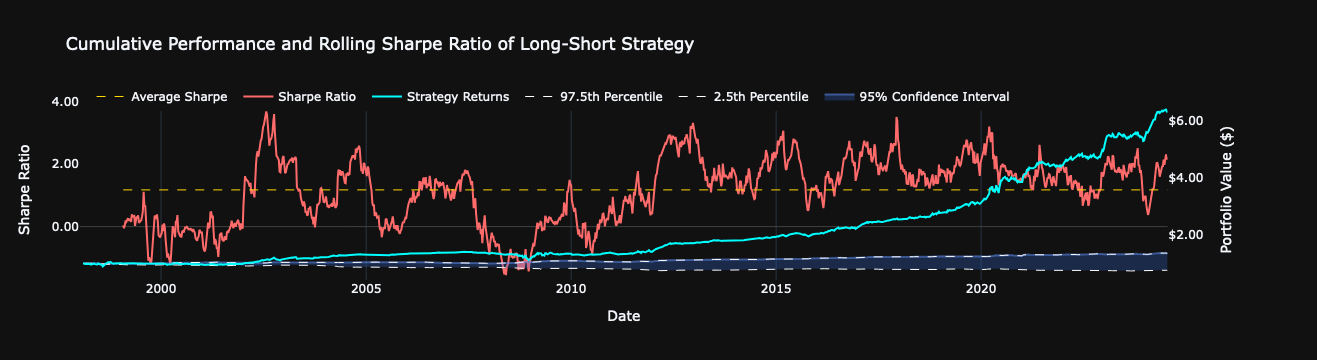

In [8]:
evaluator.performance_plot


**Signal Decile Plot:**
This visualization presents the cumulative returns of the signal divided into deciles, illustrating how different strength levels of the signal perform over time. It also incorporates average Sharpe ratios for each decile.


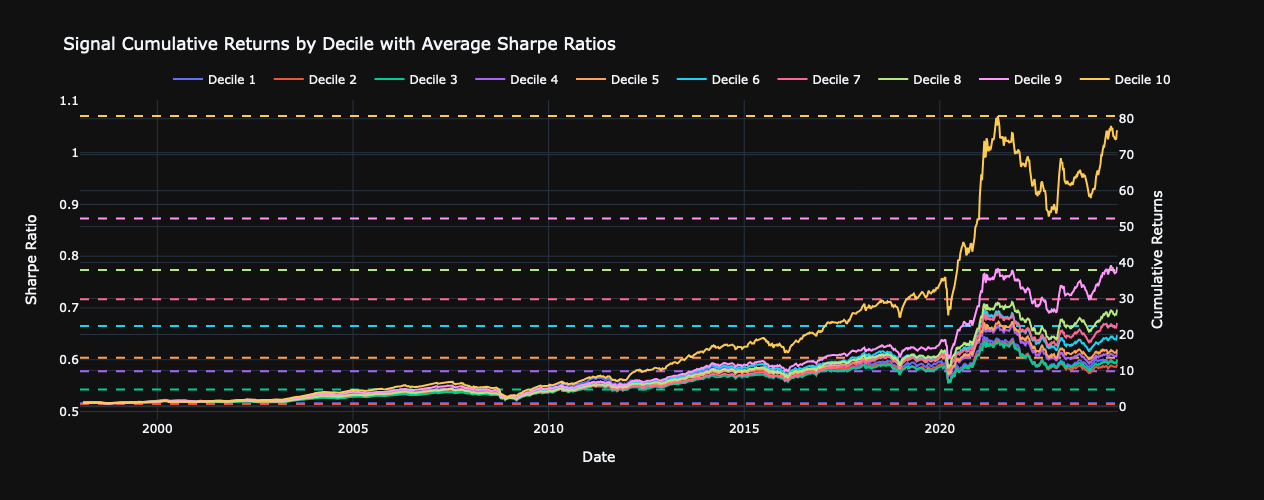

In [9]:
evaluator.signal_decile_plot

**Stress Test Plot:**
This plot demonstrates how the strategy performs during various historical stress events or market crises, providing insights into the strategy's robustness during challenging market conditions.


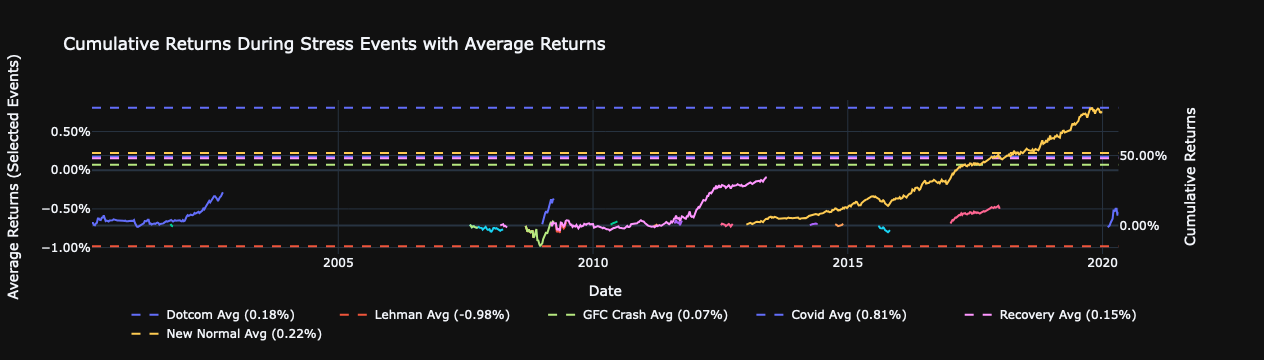

In [12]:
evaluator.stress_plot


**Drawdown Plot:**
This visualization captures the drawdowns of the strategy over time, highlighting periods of decline from previous peak values and aiding in the assessment of the strategy's risk profile.



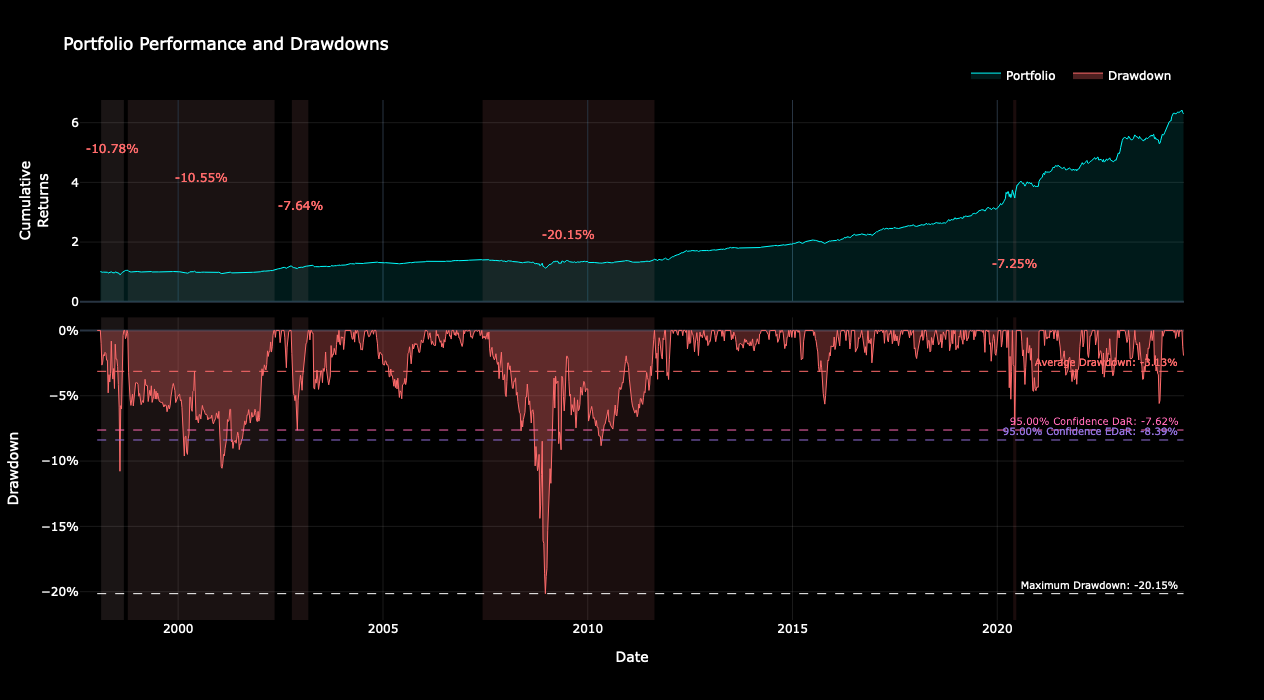

In [13]:
evaluator.drawdown_plot

**Return Distribution Plot:**
This plot illustrates the distribution of returns for the strategy, typically in the form of a histogram. It often includes key statistics such as mean return, standard deviation, and various risk metrics.


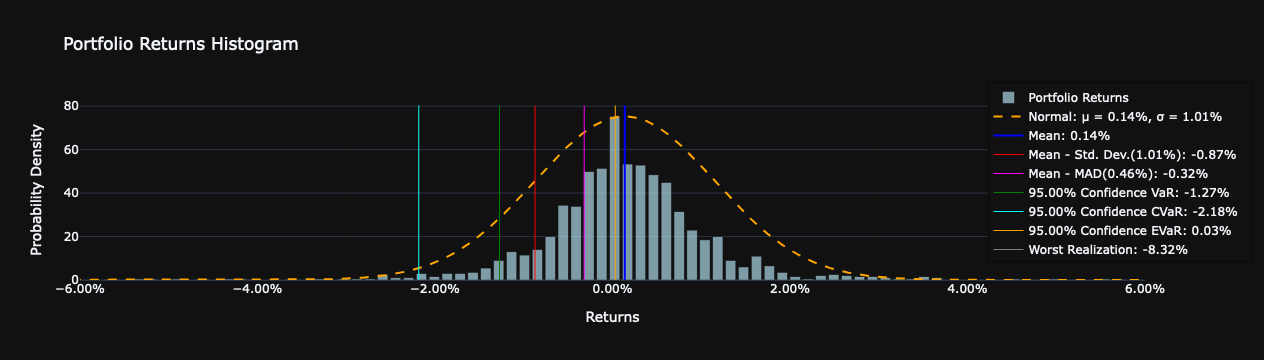

In [14]:
evaluator.distribution_plot


**Returns Heatmap:**
This heatmap visualization displays the strategy's returns across different months and years, helping to identify any seasonal patterns in the strategy's performance.


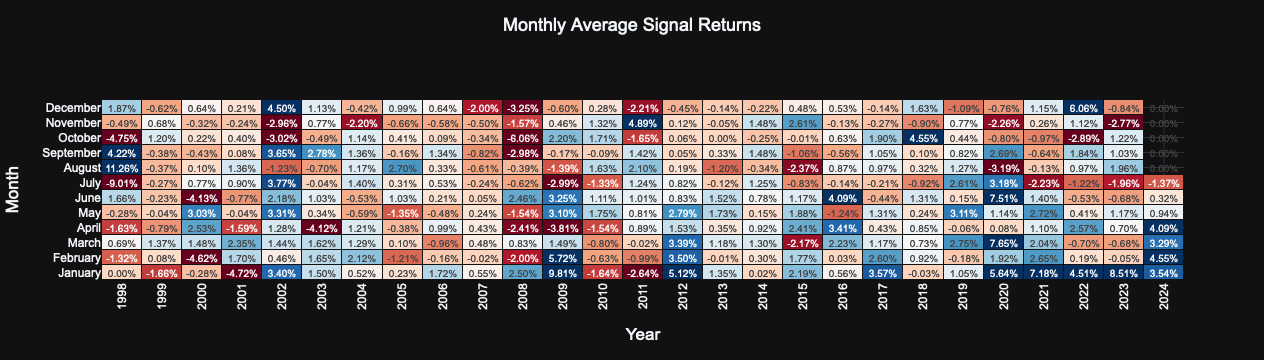

In [15]:
evaluator.returns_heatmap_plot


**Signal Autocorrelation Plot:**
This plot reveals the autocorrelation of the signal over time, offering insights into the signal's persistence and predictive power.



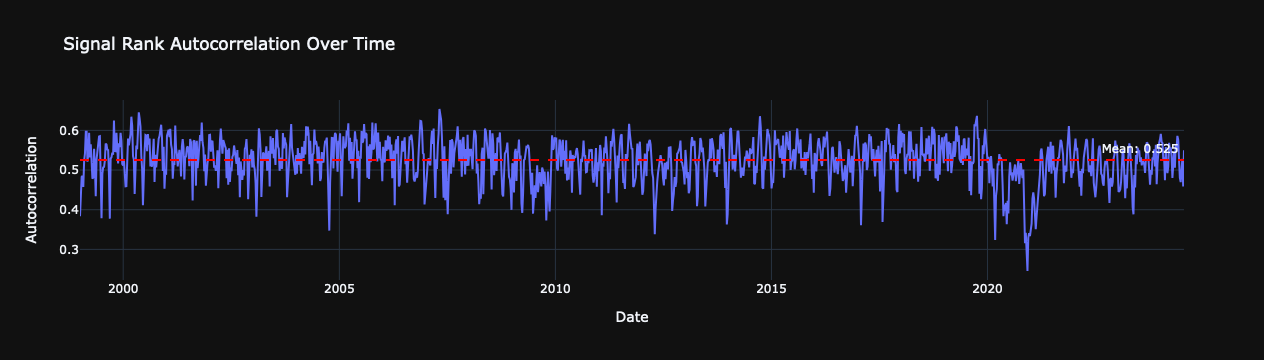

In [16]:
evaluator.signal_correlation_plot

**Portfolio Turnover Plot:**
This visualization depicts the portfolio turnover over time, often separated into long and short positions, aiding in the assessment of trading costs and strategy stability.



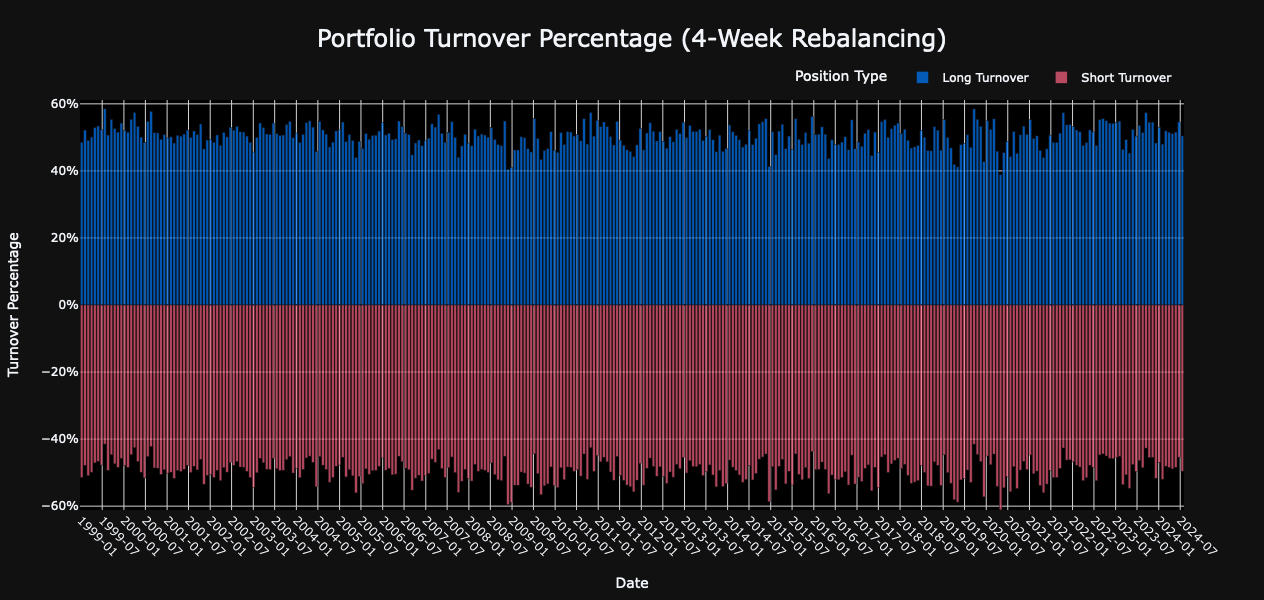

In [17]:
evaluator.turnover_plot

**Performance Statistics Table:**
This comprehensive table presents key performance statistics for the strategy, including metrics such as annualized returns, Sharpe ratio, maximum drawdown, and other relevant indicators.


In [18]:
evaluator.performance_table

**Drawdown Analysis Table:**
This detailed table enumerates the worst drawdown periods for the strategy, including their magnitude, duration, and recovery times.


In [19]:
evaluator.drawdown_table


### Other Core Attributes

1. **Position Holdings:** `evaluator.positions`
1. **Rebalance Schedule:** `evaluator.rebalance_mask`
1. **Actual Holdings:** `evaluator.holdings`
1. **Asset Returns:** `evaluator.returns`
1. **Position Returns:** `evaluator.position_returns`
1. **Rebalanced Returns:** `evaluator.resampled_returns`
1. **Portfolio Returns:** `evaluator.portfolio_returns`
1. **Cumulative Performance:** `evaluator.cumulative_returns`

In [ ]:
evaluator.cumulative_returns